In [14]:
from keras.datasets import cifar10

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("The CIFAR10 database has a training set of %d examples." % len(X_train))
print("The CIFAR10 database has a test set of %d examples." % len(X_test))

The CIFAR10 database has a training set of 50000 examples.
The CIFAR10 database has a test set of 10000 examples.


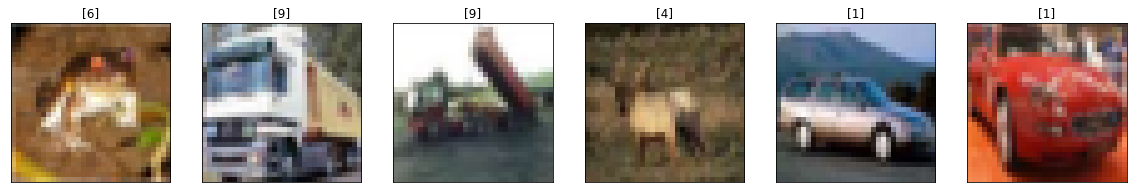

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))


In [16]:
img=X_train[0]
img.shape

(32, 32, 3)

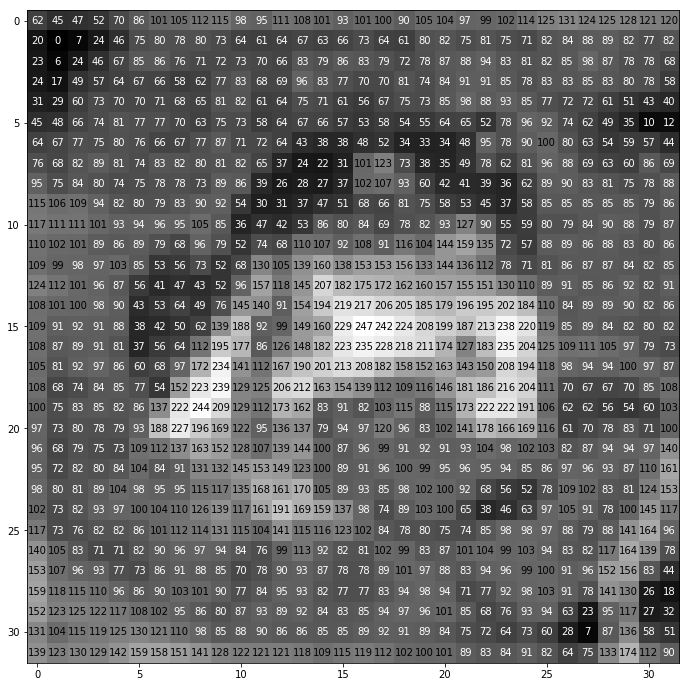

In [17]:
import cv2

def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
#image=cv2.imread(X_train[0])
gray = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2GRAY)
visualize_input(gray, ax)

In [18]:
max(y_train)

array([9], dtype=uint8)

In [19]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [20]:
from collections import Counter
counted = Counter(np.concatenate( y_train, axis=0 ))
counted

Counter({0: 5000,
         1: 5000,
         2: 5000,
         3: 5000,
         4: 5000,
         5: 5000,
         6: 5000,
         7: 5000,
         8: 5000,
         9: 5000})

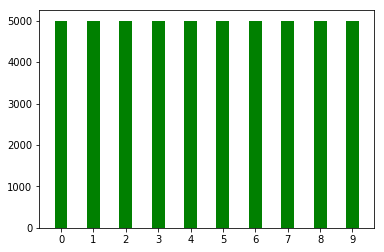

In [21]:
plt.bar(counted.keys(), counted.values(), 0.4, color='g')
plt.xticks(np.arange(0, 10, 1)) 
plt.show()

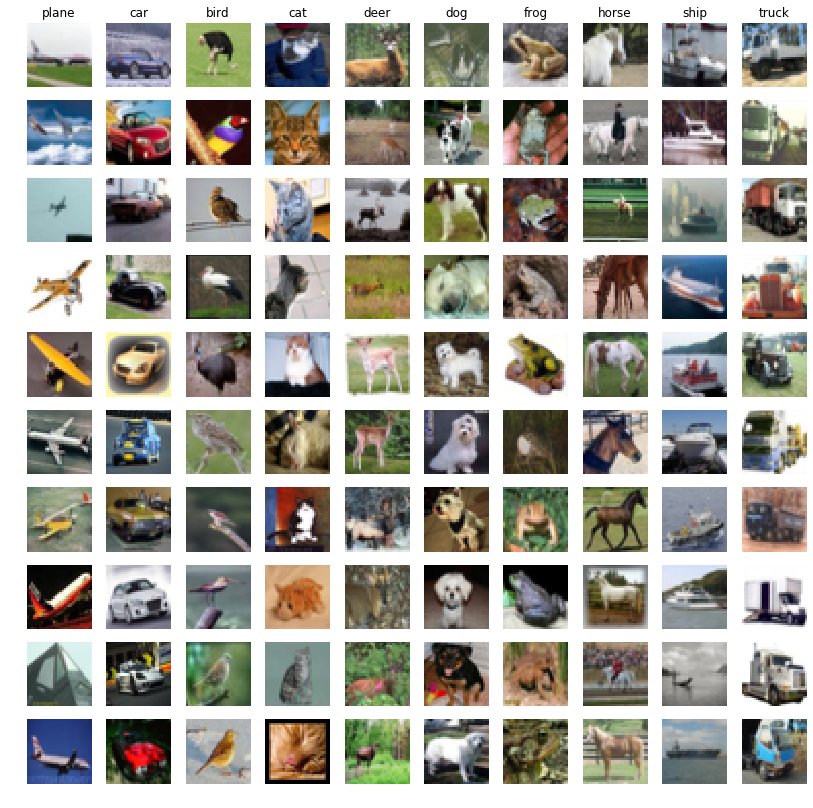

In [22]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 10
fig = plt.figure(figsize=(14,14))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train = X_train/255

In [0]:
X_test = X_test/255

In [0]:
X_train=X_train .reshape((50000, 32 * 32*3))
X_test=X_test .reshape((10000, 32 * 32*3))


In [27]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [28]:
X_train.shape

(50000, 3072)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import Conv2D, MaxPooling2D
opt=Adam(lr=10e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# Create the model
# define the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(32 * 32*3,)))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
50000/50000 [==============================] - 7s 145us/step - loss: 14.4766 - acc: 0.0999
Epoch 2/5
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000
Epoch 3/5
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000
Epoch 4/5
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000
Epoch 5/5
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000


In [32]:
# evaluate test accuracy
score = model.evaluate(X_test,y_test)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 141us/step
Test accuracy: 10.0000%
